# Question 1
- Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.<br>
- Create at least one function and one lambda function.<br>
- Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK.<br>
- Open your CSV file, generate a log-log figure according to the data you saved.
- Write a conclusion at the end of your code base on your figure.

----- Importing files ------

In [16]:
#Use ’glob’ to open and read file. If read multiple files use LOOP to achieve
import nltk, glob, os, csv
from nltk.corpus import gutenberg

--- initializing variables ----

In [17]:
count = 1;
file_path = (gutenberg.abspath('shakespeare-caesar.txt')[:-22]) + 'shakespeare*.txt'
#D:\\nltk_data\\corpora\\gutenberg\\shakespeare*.txt
x = len(gutenberg.abspath('shakespeare-caesar.txt'))
path_length = (lambda x:x-22)(x)
word_list = {}
file_directory = (gutenberg.abspath('shakespeare-caesar.txt'))[:-22]
format = "%a %b %d %H:%M:%S %Y"

--- defining functions ----

In [20]:
#defining function to sort the dictionary
def count_words_infile(filename):
    words_in_file = gutenberg.words(filename)
    for word in words_in_file:
        if word.isalpha():
            word_list[word] = word_list.get(word, 0) + 1



In [9]:
# counting words in shakespeare files          
print('counting words in shakespeare files.')
for filename in glob.glob(file_path):
    with open(filename, 'r') as f:
        count_words_infile(filename[path_length:])
        
#sorting the list
print('sorting word list.')
sorted_word_list = [(k, word_list[k]) for k in sorted(word_list, key=word_list.get, reverse=True)]

counting words in shakespeare files.
sorting word list.


In [10]:
#open csv file and write title
print('Opening csv file.')
open_csv_file = open('rank.csv','w')
csv_writer = csv.writer(open_csv_file, delimiter=',', lineterminator='\n')
csv_writer.writerows([['Word','Rank','Frequency']])

# writing words,rank and frequency into csv file
print('Writing into csv file.')
for k,v in sorted_word_list:
    csv_writer.writerow((k, count, v))
    count += 1
open_csv_file.close() 
print('Writing csv file completed.')#8939

Opening csv file.
Writing into csv file.
Writing csv file completed.


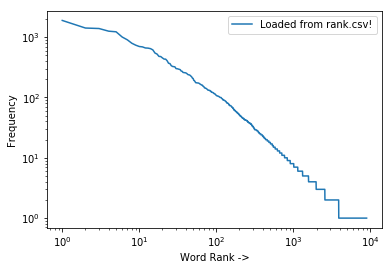

Plotting data completed.


In [11]:
import matplotlib.pyplot as plt
words = []
frequency = []
count=0
with open('rank.csv','r') as csvf:
    plots = csv.reader(csvf, delimiter=',', lineterminator='\n')
    for row in plots:
        if(count >0):
            words.append(int(row[1]))
            frequency.append(int(row[2]))
        count += 1

#print(words)
#print(frequency)
plt.loglog(words,frequency, label='Loaded from rank.csv!')
plt.xlabel('Word Rank ->')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print('Plotting data completed.')
        

In [23]:
print('The above diagram shows that the top 20% of the words contains 80% of text from shakespeare files in gutenberg. The data also conform to Zipfs law to the extent that the plot is linear for a log-log graph.')

The above diagram shows that the top 20% of the words contains 80% of text from shakespeare files in gutenberg. The data also conform to Zipfs law to the extent that the plot is linear for a log-log graph.


In [193]:
#'melville-moby_dick.txt',
#'milton-paradise.txt',
#'shakespeare-caesar.txt',
#'shakespeare-hamlet.txt',
#'shakespeare-macbeth.txt',
# whitman-leaves.txt
#fpath = gutenberg.abspath('shakespeare-caesar.txt')
#FileSystemPathPointer('D:\\nltk_data\\corpora\\gutenberg\\austen-emma.txt')

#filtered_words = [word for word in file-data if word not in web-words]
